<h3> Code partially taken from: https://github.com/akcarsten/akcarsten.github.io/blob/master/fMRI_data_analysis/Intro%20to%20fMRI%20Data.ipynb
https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba

In [77]:
#NiBabel supports an ever growing collection of neuroimaging file formats.
#!pip install nibabel
#!pip install utils

In [81]:

import requests
import zipfile
import pandas as pd
import numpy as np
import os
import nibabel
import matplotlib.pyplot as plt
import utils
%matplotlib inline


In [99]:
#from interpretation import sensitivity_analysis
from utils import plot_slices


ImportError: cannot import name 'plot_slices'

In [82]:
#locate file
data_path = '/Users/Nand/Desktop/Deep_Learning/Project/Ex_data/sM00223/'
files = os.listdir(data_path)

#read data
data_all = []
for data_file in files:
    if data_file[-3:] == 'hdr':
        data = nibabel.load(data_path + data_file).get_data()

In [83]:
print(data.shape)

(256, 256, 54, 1)


In [84]:
#locate file
data_path1 = '/Users/Nand/Desktop/Deep_Learning/Project/Play/'
files1 = os.listdir(data_path1)

#read data
data_all1 = []
for data_file1 in files1:
    if data_file1[-3:] == 'nii':
        data1 = nibabel.load(data_path1 + data_file1).get_data()

In [85]:
#each image is 256 x 256 voxels in size and 256 slices are collected
print(data1.shape)

(256, 256, 256)


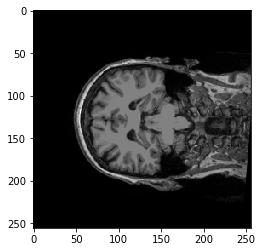

In [86]:
plt.imshow(data1[:,:,100], 'gray')

In [92]:
def plot_slices(data, title=None):
    plt.figure(figsize=(5.5, 2.2))
    vmax = np.abs(data).max()
    for i in (0, 6, 11):
        plt.subplot(1, 3, i // 5 + 1)
        plt.imshow(data[:, :, i], vmin=-vmax, vmax=vmax,
                   interpolation="nearest", cmap=plt.cm.RdBu_r)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(hspace=0.05, wspace=0.05, left=.03, right=.97, top=.9)
    if title is not None:
        plt.suptitle(title, y=.95)

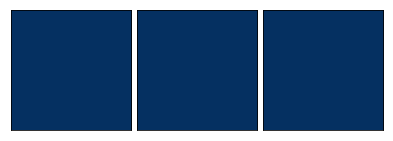

In [96]:
plot_slices(data1)

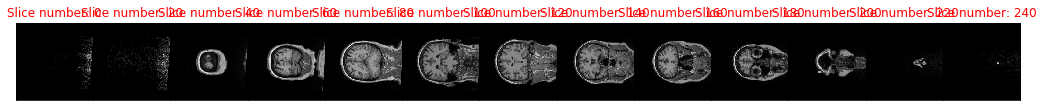

In [97]:
fig, ax = plt.subplots(1, 13, figsize=[18, 3])

n = 0
slice = 0
i = 1
for _ in range(13):
    ax 
    ax[n].imshow(data1[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 20
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [104]:

# Basic information about the data acquisition
x_size = 256
y_size = 256
n_slice = 256
n_volumes = 96

# Find all files in the data folder
data_path2 = '/Users/Nand/Desktop/Deep_Learning/Project/Play1/'
files2 = os.listdir(data_path2)

# Read in the data and organize it with respect to the acquisition parameters
data_all2 = []
for data_file2 in files2:
    if data_file2[-3:] == 'nii':
        data2 = nibabel.load(data_path2 + data_file2).get_data()        
        data_all2.append(data2.reshape(x_size, y_size, n_slice))


<h3>
<li> transverse - head to feet </li>
<li> coronal - front to back  </li>
<li> sagitttal - left to right  </li>

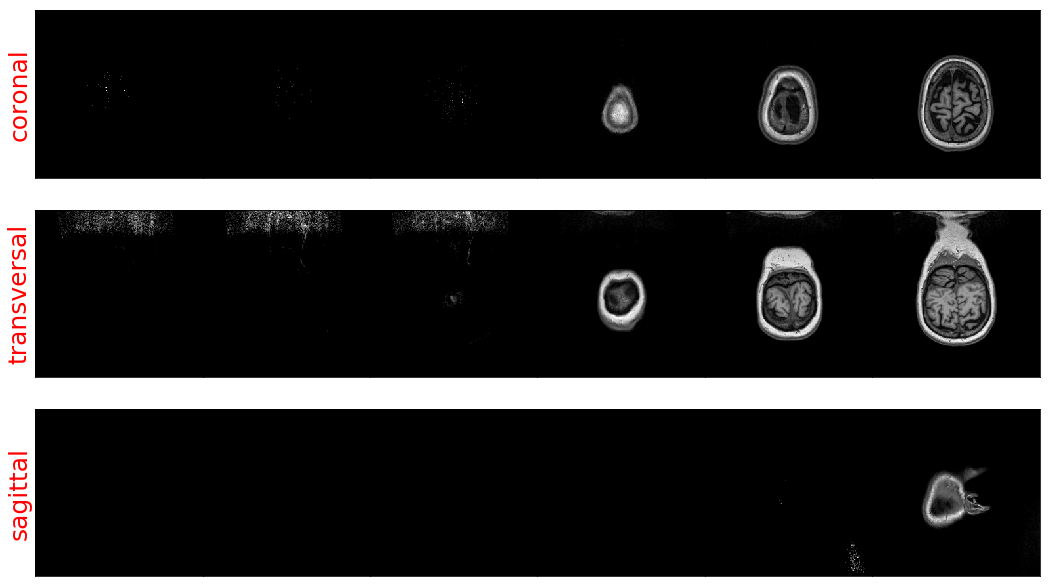

In [111]:
# Create a 3x6 subplot 
fig, ax = plt.subplots(3, 6, figsize=[18, 11])

# Orgaize the data for visualisation in the coronal plane
coronal = np.transpose(data_all2, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)

# Orgaize the data for visualisation in the transversal plane
transversal = np.transpose(data_all2, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)

# Orgaize the data for visualisation in the sagittal plane
sagittal = np.transpose(data_all2, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)

# Plot some of the images in different planes
n = 10
for i in range(6):
    ax[0][i].imshow(coronal[:, :, n, 0], cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('coronal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[1][i].imshow(transversal[:, :, n, 0], cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('transversal', fontsize=25, color='r')
    n += 10
    
n = 5
for i in range(6):
    ax[2][i].imshow(sagittal[:, :, n, 0], cmap='gray')
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('sagittal', fontsize=25, color='r')
    n += 10

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()